D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


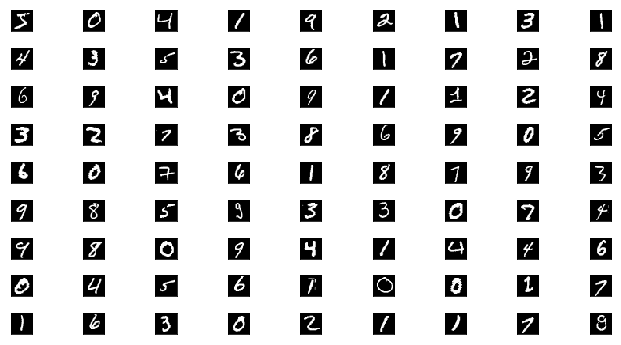

In [1]:
# http://forhighlow0.hatenablog.com/entry/2017/08/14/154955
# Requirements:
# - conda install keras

# データの確認
%matplotlib inline
import keras
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

import mnistlib

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

mnistlib.imshow_n(9, 9, x_train_raw)
plt.show()

In [2]:
### データの準備
num_classes = 10
x_train = x_train_raw.reshape(60000, 784) # 28x28 pixels -> 784x1 integers
x_test  = x_test_raw .reshape(10000, 784)

# Normalize: 0-255 -> 0.0-1.0
x_train = x_train.astype('float32')
x_test  = x_test .astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train_raw.astype('int32')
y_test  = y_test_raw .astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test , num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test .shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [3]:
### Setting up the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(rate=0.8))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [4]:
%%time
### Fit
# 26.6s on Fran
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.7510 - acc: 0.7597 - val_loss: 0.2259 - val_acc: 0.9356
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4065 - acc: 0.8886 - val_loss: 0.2103 - val_acc: 0.9452
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3581 - acc: 0.9084 - val_loss: 0.1830 - val_acc: 0.9553
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3460 - acc: 0.9162 - val_loss: 0.1822 - val_acc: 0.9577
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3372 - acc: 0.9206 - val_loss: 0.1793 - val_acc: 0.9603
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3267 - acc: 0.9249 - val_loss: 0.1796 - val_acc: 0.9615
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0

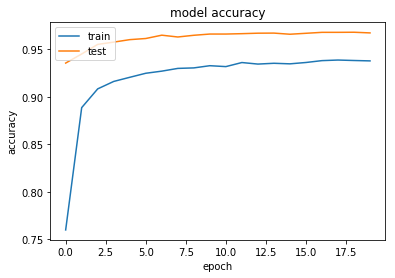

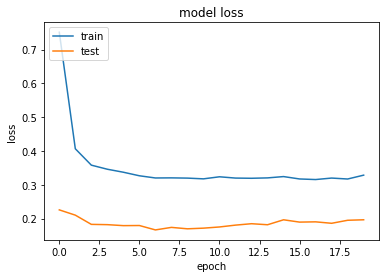

In [5]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

offset = 9745


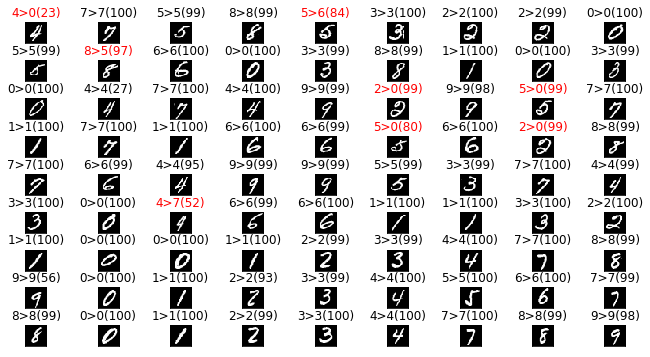

9745: p=0.2364, label=0, correct=False
2823: p=0.2382, label=7, correct=True
659: p=0.2516, label=2, correct=True
6091: p=0.2592, label=9, correct=True
7595: p=0.2759, label=8, correct=False
9764: p=0.2795, label=4, correct=True
1828: p=0.2800, label=3, correct=True
1039: p=0.2814, label=8, correct=False
6740: p=0.2872, label=0, correct=False
6011: p=0.2877, label=8, correct=False


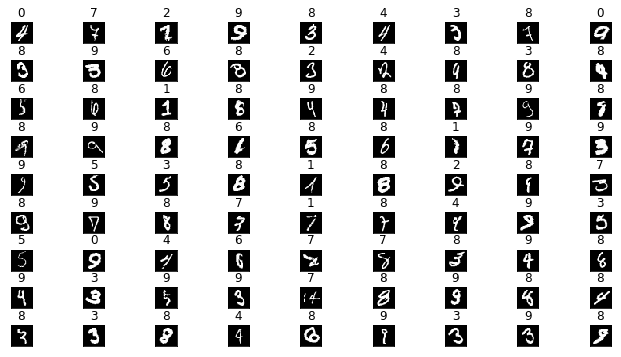

In [7]:
#(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()
import mnistlib
result = model.predict(x_test)  # result は shape (データ数, 10) で、各ラベルの確率が入っている
offset = 9745
print("offset =", offset)
def _iter_title():
    i = 0
    while True:
        label_test = y_test_raw[offset+i]
        label_pred = result[offset+i].argmax()
        p = result[offset+i][label_pred]
        title = '%d>%d(%02d)' % (label_test, label_pred, p*100.0)
        if label_test==label_pred:
            yield title
        else:
            yield (title, {'color':'red'})
        i+=1
mnistlib.imshow_n(9, 9, x_test[offset:], _iter_title())
plt.show()

# resultの各サンプルについてもっとも確率の高い列番号(ラベル)の配列を得る
max_labels = result.argmax(axis=1)
# もっとも高い確率の配列を得る（行ごとにソートしたものの最右列だけ見る）
max_probs = np.sort(result, axis=1)[:,-1]
# [[サンプル番号、最高ラベル、最高確率], ...]の行列を作成
max_data = np.c_[np.arange(len(max_probs)), max_labels, max_probs]
# 行列を確率の低い順に並び替える
max_data = max_data[ np.argsort(max_data[:,2]) ]
for (i, label, prob) in max_data[:10]:
    print("%d: p=%.4f, label=%d, correct=%s" % (i, prob, label, str(label==y_test_raw[int(i)])))

mnistlib.imshow_n(9, 9, x_test[max_data[:,0].astype(np.int)], titles=max_data[:,1].astype(np.int))
plt.show()
